In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

### listening-counts.tsv

In [2]:
chunk_size = 1000000
chunks = []
df_dtype = {'user_id': 'int32', 'track_id': 'int32', 'count': 'int16'}
for i, chunk in enumerate(pd.read_csv('./data/listening-counts.tsv', sep='\t', dtype=df_dtype, chunksize=chunk_size)):
    chunks.append(chunk)
listening = pd.concat(chunks, ignore_index=True)
listening

,user_id,track_id,count
0,92915,26719936,1
1,92915,4271407,1
2,92915,4606511,1
3,92915,8966085,1
4,92915,12290897,1
...,...,...,...
519293328,119080,44144633,1
519293329,119080,45141923,1
519293330,119080,46171716,1
519293331,119080,46245572,1


In [3]:
print(len(listening['user_id'].unique()))
print(len(listening['track_id'].unique()))

120322
50813373


In [4]:
listening['count'].max()

31737

In [5]:
listening_count = listening.groupby('track_id').agg({'user_id': 'count', 'count': 'sum'})
listening_count.columns = ['n_user', 'total_listening']
listening_count

,n_user,total_listening
track_id,,
0,1,2
1,1,1
2,1,2
3,1,1
4,1,6
...,...,...
50813368,1,1
50813369,1,1
50813370,2,2


In [6]:
listening_count.value_counts('n_user')

n_user
1        30954990
2         6233926
3         2920066
4         1755503
5         1194475
           ...   
6573            1
6574            1
6579            1
6582            1
28668           1
Name: count, Length: 7634, dtype: int64

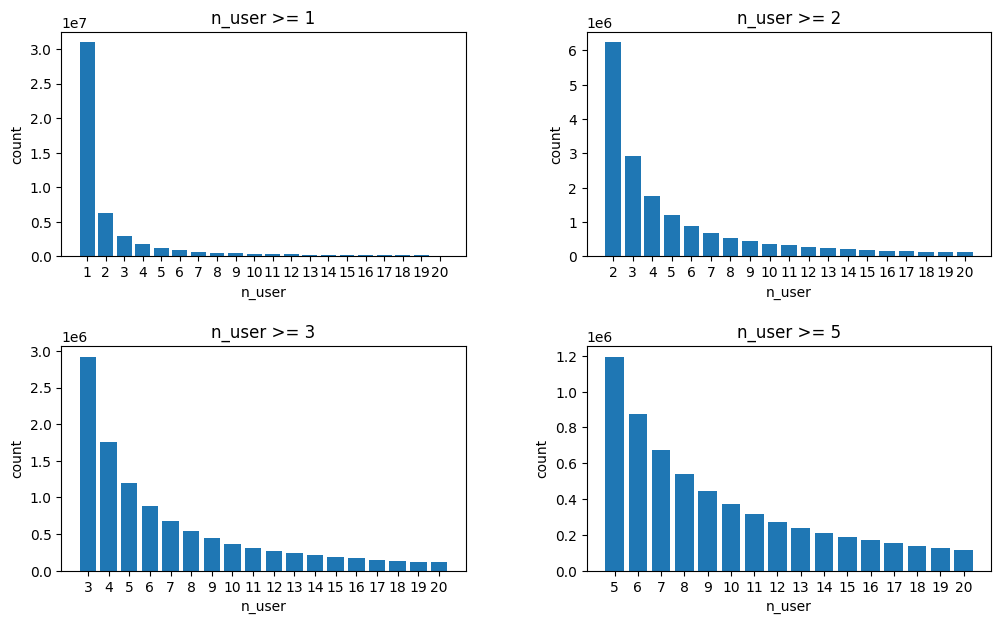

In [28]:
listening_count_graph = listening_count.value_counts('n_user')[:20]
plt.figure(figsize=(12,7))
plt.subplots_adjust(wspace=0.3, hspace=0.4)
for i, idx in enumerate([1,2,3,5]):
    plt.subplot(2,2,i+1)
    plt.title(f'n_user >= {idx}')
    plt.xlabel('n_user')
    plt.ylabel('count')
    plt.xticks(range(idx,21,1))
    plt.bar(listening_count_graph[idx-1:].index, listening_count_graph[idx-1:].values)

### users.tsv

In [7]:
users = pd.read_csv('./data/users.tsv', sep='\t')
users

,user_id,country,age,gender,creation_time
0,0,UK,31,m,2002-12-28 01:00:00
1,1,US,43,m,2003-04-15 02:00:00
2,2,UK,35,m,2002-10-29 01:00:00
3,3,BR,31,m,2003-07-20 02:00:00
4,4,NaN,51,m,2003-07-21 02:00:00
...,...,...,...,...,...
120317,120317,RU,19,m,2012-07-21 18:15:05
120318,120318,NaN,-1,n,2012-07-23 21:17:42
120319,120319,BY,19,f,2012-07-19 22:07:27
120320,120320,NaN,-1,m,2012-07-23 19:25:08


In [8]:
print('country_KR :', len(users[users['country']=='KR']))
users[users['country']=='KR'].head()

country_KR : 35


,user_id,country,age,gender,creation_time
2531,2531,KR,35,m,2005-09-29 11:17:12
3645,3645,KR,29,m,2006-01-21 13:30:43
4559,4559,KR,33,m,2006-03-28 12:52:18
9699,9699,KR,39,m,2007-01-25 07:03:58
9780,9780,KR,29,m,2007-01-28 20:43:17


### tracks.tsv

In [9]:
df_dtype = {'track_id': 'int32'}
tracks = pd.read_csv('./data/tracks.tsv', sep='\t', dtype=df_dtype, on_bad_lines='skip')
tracks

,track_id,artist_name,track_name
0,0,Mika Miko,NaN
1,1,Comm,
2,2,deadmau5,
3,3,Rasheed Chappell,
4,4,rck,
...,...,...,...
50723391,50813368,ЗупиниЛося,"🦌 ЗупиниЛося №60. Бійки, стрілянина і табуни д..."
50723392,50813369,ЗупиниЛося,🦌 ЗупиниЛося №69. Повний паркувальний бардак н...
50723393,50813370,Lost Cascades,🧝‍♀️ 𝒜 𝒮𝓉𝓇𝒶𝓃𝑔𝑒𝓇 𝒜𝓅𝓅𝓇𝑜𝒶𝒸𝒽𝑒𝓈: '𝒟𝓇𝒶𝓊⻕
50723394,50813371,Lost Cascades,🧝♀️ 𝒜 𝒮𝓉𝓇𝒶𝓃𝑔𝑒𝓇 𝒜𝓅𝓅𝓇𝑜𝒶𝒸𝒽𝑒𝓈: '𝒟𝓇𝒶𝓊𝑔𝒽𝓉 𝑜𝒻 𝐵𝓁𝑒𝓈𝓈𝑒𝒹...


### artists.tsv

In [10]:
artists = pd.read_csv('./data/artists.tsv', sep='\t')
artists

,artist_id,artist_name
0,0,NaN
1,1,##Horror Inc
2,2,840 8:>;09GC:
3,3,;5:A0=4@ 20:8= (>: >3)
4,4,0=40 G5BK@QE
...,...,...
5159208,5159575,🦁 ИСТОРИЯ ПАДЕНИЯ КОНОРА МАКГРЕГОРА
5159209,5159576,🦄 Unicorn On Ketamine 🦄
5159210,5159577,🦄 expedizion
5159211,5159578,🦌 ЗупиниЛося №55. ДТП з постраждалими на зустр...


In [11]:
artists.iloc[5146801:5146817]

,artist_id,artist_name
5146801,5147168,에이핑크 (Apink)
5146802,5147169,"에이핑크 보미, 남주"
5146803,5147170,에이핑크(A Pink)
5146804,5147171,에이핑크(Apink)
5146805,5147172,에일리
5146806,5147173,에일리 & 2LSON
5146807,5147174,에일리 & 2LSON (Ailee & 2LSON)
5146808,5147175,에일리 (Ailee)
5146809,5147176,에일리 Ailee
5146810,5147177,에일리 Feat. Verbal Jint


### albums.tsv

In [12]:
albums = pd.read_csv('./data/albums.tsv', sep='\t', on_bad_lines='skip')
albums

C:\Users\jaegwon\AppData\Local\Temp\ipykernel_20920\1726265373.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  albums = pd.read_csv('./data/albums.tsv', sep='\t', on_bad_lines='skip')


,album_id,album_name,artist_name
0,0,NaN,NaN
1,1,NaN,##Horror Inc
2,2,NaN,840 8:>;09GC:
3,3,NaN,DEÿD VIRGIN
4,4,NaN,!
...,...,...,...
24208970,24237343,🟠Tvelve Hours of Sunset 🟡2012 🔴1976 1984 1994 ...,David Bedford
24208971,24237344,"🟣Carte Blanche 🔴1808,1838,1816,1910,1824,1921,...","Mildred J. Hill, Patty Hill"
24208972,24237345,"🟣Carte Blanche 🔴1808,1838,1816,1910,1824,1921,...",Witold Lutosławski
24208973,24237346,🟧Fear of Music 🟩🟦2006,Talking Heads


In [13]:
# 데이터의 column 개수 오류로 skip된 부분
albums.iloc[2432152:2432156]

,album_id,album_name,artist_name
2432152,2432484,!?;02K_<8:A DJ Navvy,25-17 ?.C. Jeep
2432153,2432485,!?;02K_<8:A DJ Navvy,25/17
2432154,2432488,!?>:>9=K5 =8,%C3>-#3>
2432155,2432489,!?CB=8:,L'One


### tags.json

In [2]:
tags = []
with open('./data/tags.json', encoding='utf-8') as f:
    for line in f:
        tag = json.loads(line)
        tags.append(tag)
print(len(tags))
tags[0]

2230814


{'_id': {'artist': 'Gotye', 'track': 'Somebody That I Used to Know'},
 'tags': {'indie': 100,
  'alternative': 79,
  'electronic': 40,
  'australian': 37,
  'love at first listen': 37,
  'pop': 19,
  'gotye': 11,
  'beautiful': 11,
  'indie pop': 10,
  'Love': 7,
  'melancholy': 6,
  '2012': 6,
  '2011': 6,
  '10s': 6,
  'rock': 5,
  'FUCKING AWESOME': 5,
  'singer-songwriter': 4,
  'duet': 4,
  'indie rock': 4,
  'hypnotic': 4,
  'catchy': 4,
  'male vocalists': 4,
  'breakup': 4,
  'sad': 3,
  'belgian': 3,
  'kimbra': 3,
  'sad and depressing but oh so beautiful': 3,
  'lyrical excellence': 3,
  'strange but in a good way': 3,
  'Aussie': 3,
  '2010s': 3,
  'best of 2012': 3,
  'addicting': 3,
  'art pop': 3,
  'thinking of you': 3,
  'alternative rock': 2,
  'female vocalists': 2,
  'favorites': 2,
  '8 of 10 stars': 2,
  'Atmosphere': 2,
  'if this were a pokemon i would catch it': 2,
  'joy and misery': 2,
  'I Love This Vocal': 2,
  'christian alexander tietgen': 2,
  'Awesome':

In [15]:
# tags.i == track_id
tracks[tracks['track_id']==36346257]

,track_id,artist_name,track_name
36281859,36346257,Gotye,Somebody That I Used to Know


### tags-micro-genres.json

In [3]:
tags_micro_genres = []
with open('./data/tags-micro-genres.json', encoding='utf-8') as f:
    for line in f:
        tag = json.loads(line)
        tags_micro_genres.append(tag)
print(len(tags_micro_genres))
tags_micro_genres[0]

1638468


{'_id': {'artist': 'Gotye', 'track': 'Somebody That I Used to Know'},
 'tags': {'pop': 19,
  'indie pop': 10,
  'rock': 5,
  'singer-songwriter': 4,
  'indie rock': 4,
  'art pop': 3,
  'alternative rock': 2,
  'atmosphere': 2,
  'electropop': 1,
  'lo-fi': 1,
  'indietronica': 1},
 'i': 36346257}

### lyrics-features.json

In [4]:
lyrics_features = []
with open('./data/lyrics-features.json', encoding='utf-8') as f:
    for line in f:
        lyric = json.loads(line)
        lyrics_features.append(lyric)
print(len(lyrics_features))
lyrics_features[0]

1266554


{'_id': {'artist': 'Sweatshop Union', 'track': 'The Way'},
 'features': {'lexical': {'token_count': 630,
   'line_count': 65,
   'character_count': 2757,
   'stop_word_count': 248,
   'hyphen_count': 2},
  'compression_ratio': 2.0993227990970653,
  'entropy': 5.017779379549799},
 'i': 40817731,
 'bert': {'$binary': {'base64': 'gASVhQ0AAAAAAACMDHRvcmNoLl91dGlsc5SMEl9yZWJ1aWxkX3RlbnNvcl92MpSTlCiMDXRvcmNoLnN0b3JhZ2WUjBBfbG9hZF9mcm9tX2J5dGVzlJOUQv0MAACAAooKbPycRvkgaqhQGS6AAk3pAy6AAn1xAChYEAAAAHByb3RvY29sX3ZlcnNpb25xAU3pA1gNAAAAbGl0dGxlX2VuZGlhbnECiFgKAAAAdHlwZV9zaXplc3EDfXEEKFgFAAAAc2hvcnRxBUsCWAMAAABpbnRxBksEWAQAAABsb25ncQdLBHV1LoACKFgHAAAAc3RvcmFnZXEAY3RvcmNoCkZsb2F0U3RvcmFnZQpxAVgNAAAAMjM5OTk3OTEyNjE2MHECWAYAAABjdWRhOjBxA00AA050cQRRLoACXXEAWA0AAAAyMzk5OTc5MTI2MTYwcQFhLgADAAAAAAAAKQRTPpzrSr1x5PA+dumXveDnTz7IjKO9R/SMPnLGnT7MBwk+/rx3vndsYD585oi+qmOuvuhraD5lPiy+7csIP7+dpT7d4I6+lX30Pfwz0z4bXrY++CNPPgvjlT1zbrg+9fqWPlLQmrzILVu+1y5dvhqLSL7Rqk6+2jzzPqQdVT7qyX++WMgIvxNelT1IzCG95JUovs4tSb3ev6E9yW4

### spotify-uris.tsv

In [18]:
uris = pd.read_csv('./data/spotify-uris.tsv', sep='\t')
uris

,track_id,uri
0,36346257,4wCmqSrbyCgxEXROQE6vtV
1,32496162,4G8gkOterJn0Ywt6uhqbhp
2,33619193,1c8gk2PeTE04A1pIDH9YMk
3,32083560,7w87IxuO7BDcJ3YUqCyMTT
4,45222862,6mFkJmJqdDVQ1REhVfGgd1
...,...,...
2378107,25969718,7nzq9ostb7WLVKWaDw6PXn
2378108,25970443,149o3oF6f81e7YIJdhJrQa
2378109,25971777,5ysnVwfWfzvgX8oHIwJZ35
2378110,25974942,4TfMU0JTZ2yzIf3asfRIEA
